In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"../dataset/car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df_final = df.drop('Car_Name',axis=1)

In [6]:
df_final["Current_Year"] = 2022
df_final["no_of_years"] = df_final["Current_Year"] - df_final["Year"]

In [8]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [10]:
df_final_2 = df_final.drop(['Year', 'Current_Year'],axis=1)

In [11]:
df_final_2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [12]:
df_final_2 = pd.get_dummies(df_final_2,drop_first=True,)
df_final_2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [13]:
corr_matrix = df_final_2.corr()
corr_matrix['Selling_Price'].sort_values()

Seller_Type_Individual   -0.550724
Fuel_Type_Petrol         -0.540571
Transmission_Manual      -0.367128
no_of_years              -0.236141
Owner                    -0.088344
Kms_Driven                0.029187
Fuel_Type_Diesel          0.552339
Present_Price             0.878983
Selling_Price             1.000000
Name: Selling_Price, dtype: float64

In [14]:
X = df_final_2.iloc[:, 1:]
Y = df_final_2.iloc[:,:1]

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [16]:
x_train.shape, x_test.shape

((240, 8), (61, 8))

# Using Linear Regresion

In [17]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [18]:
linear_model.fit(x_train,y_train)

LinearRegression()

In [19]:
predictions = linear_model.predict(x_test)
predictions

array([[ 6.10775071e+00],
       [-2.09949244e-01],
       [ 2.01960774e+00],
       [ 7.07798694e+00],
       [ 8.54029413e-01],
       [ 4.55249548e+00],
       [ 9.17057146e+00],
       [ 5.89510072e+00],
       [ 1.78243230e+00],
       [ 2.34715294e+00],
       [-1.60122203e+01],
       [ 4.88691106e+00],
       [ 3.50939185e-01],
       [ 3.97815559e+00],
       [-6.52425851e-01],
       [ 6.46034535e+00],
       [ 2.67694511e-01],
       [ 2.38626816e+00],
       [ 4.36084690e+00],
       [ 5.82202902e+00],
       [ 5.70881074e+00],
       [ 5.30001840e+00],
       [ 5.68707834e+00],
       [ 3.24705397e+00],
       [ 7.05632428e-01],
       [ 7.29491684e-01],
       [ 4.19461359e+00],
       [ 1.12099507e+01],
       [ 5.58409927e+00],
       [ 7.20332230e+00],
       [ 1.84212917e+00],
       [ 5.16423351e+01],
       [ 4.08287258e+00],
       [ 3.59304291e+00],
       [ 4.82312472e+00],
       [ 5.16039491e+00],
       [ 1.71374582e+00],
       [ 2.20140049e+00],
       [ 7.9

In [21]:
import seaborn as sns

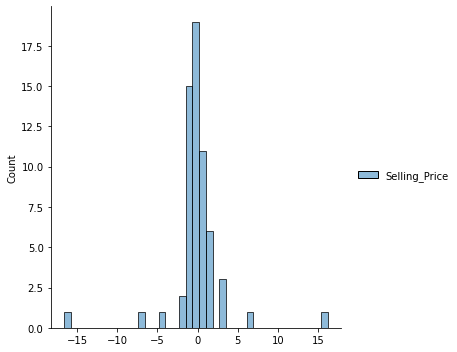

In [22]:
sns.displot(y_test-predictions)

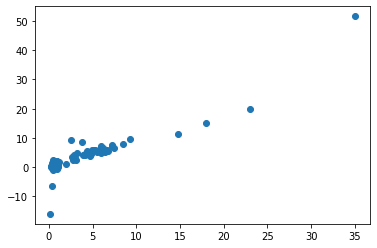

In [24]:
plt.scatter(y_test,predictions)

In [33]:
import pickle

In [34]:
file = open("linear_regression_model.pkl",'wb')
pickle.dump(linear_model,file)